# Melanoma Bineary Classification

### Probleem
In deze dataset zitten ongeveer 12.000 fotos van een mogelijke vorm van huid kanker genaamd, Melanoma. 

Het doel is om een model te maken, die gebruikt maakt van computer vision om te bepalen of een bepaalde foto wel of niet Melanoma bevat.

### Voorspelling
Ik ga een CNN model maken die hopelijk een beetje accuraat kan voorspellen of een foto dus wel of niet Melanoma heeft. 

Wel ben ik bang dat het miscchien lang gaat duren.

# Visualizing the Data

In [5]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Define the direcatories
train_dir = 'train'
test_dir = 'test'

# Define the image size
img_size = (224, 225)

# Define the batch size
batch_size = 32

# ImageDataGenerator for the training set
train_datagen = ImageDataGenerator(rescale=1./255)

# ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training set
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode='categorical')

# Load the test set
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=img_size,
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


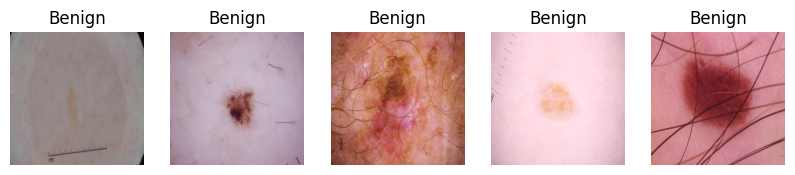

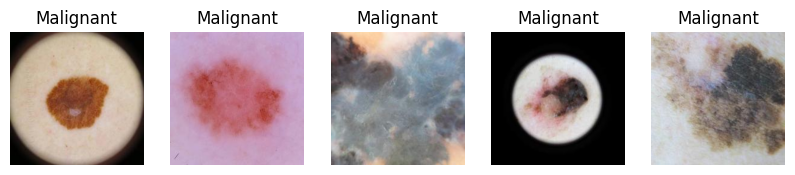

In [7]:
# Get class indices
class_indices = train_set.class_indices

# Get class labels
class_labels = {v: k for k, v in class_indices.items()}

# Plot images from each class
for class_indices, class_labels in class_labels.items():

    # Find the first 5 images from each class
    class_images = [image for image, label in zip(train_set[0][0], train_set[0][1]) if label[class_indices] == 1][:5]

    # Plot the images
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(class_images):
        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(class_labels)

Hier kan je het verschil zien tussen Malignant en Benign huids vlekken. Soms is het onderscheidt moeilijk te zien tussen deze 2, dus misschien gaat het model hier moeite mee hebben.

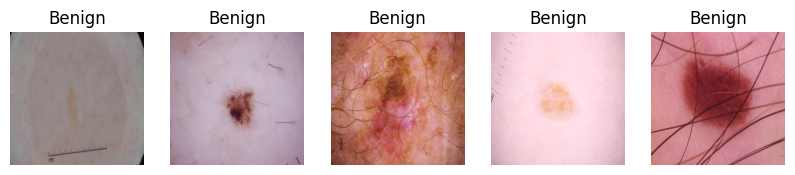

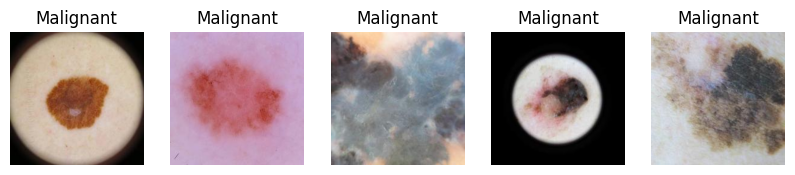

In [8]:
# Get class indices
class_indices = test_set.class_indices

# Get class labels
class_labels = {v: k for k, v in class_indices.items()}

# Plot images from each class
for class_indices, class_labels in class_labels.items():

    # Find the first 5 images from each class
    class_images = [image for image, label in zip(train_set[0][0], train_set[0][1]) if label[class_indices] == 1][:5]

    # Plot the images
    plt.figure(figsize=(10, 5))
    for i, image in enumerate(class_images):
        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(class_labels)

# Cleaning the data

We hoeven niet de data schoon te maken, omdat de plaatjes al netjes geleverd zijn.

# Training and testing the model

In [9]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adamax


# Load the InceptionV3 model
inception_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers
for layer in inception_model.layers:
    layer.trainable = False

# Define the model
model = Sequential([
    inception_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.006)),
    Dropout(0.5),
    Dense(2, activation='softmax', kernel_regularizer=l2(0.006))
    ])

optimizer = Adamax(learning_rate=0.0001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




87910968/87910968 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 22327842 (85.17 MB)
Trainable params: 525

In [11]:
# Train the model
history = model.fit(train_set,
                    validation_data=test_set,
                    epochs=10)

Epoch 1/10
372/372 [==============================] - 141s 378ms/step - loss: 2.5047 - accuracy: 0.8284 - val_loss: 2.3497 - val_accuracy: 0.8400
Epoch 2/10
372/372 [==============================] - 151s 405ms/step - loss: 2.2445 - accuracy: 0.8364 - val_loss: 2.1135 - val_accuracy: 0.8575
Epoch 3/10
372/372 [==============================] - 160s 430ms/step - loss: 2.0458 - accuracy: 0.8424 - val_loss: 1.9508 - val_accuracy: 0.8505
Epoch 4/10
372/372 [==============================] - 153s 411ms/step - loss: 1.8721 - accuracy: 0.8537 - val_loss: 1.8024 - val_accuracy: 0.8535
Epoch 5/10
372/372 [==============================] - 152s 410ms/step - loss: 1.7298 - accuracy: 0.8567 - val_loss: 1.6693 - val_accuracy: 0.8580
Epoch 6/10
372/372 [==============================] - 152s 409ms/step - loss: 1.6191 - accuracy: 0.8578 - val_loss: 1.5538 - val_accuracy: 0.8675
Epoch 7/10
372/372 [==============================] - 152s 408ms/step - loss: 1.5092 - accuracy: 0.8639 - val_loss: 1.4643 -

In [12]:
# Train the model for 10 more epochs
history = model.fit(train_set,
                    validation_data=test_set,
                    epochs=10)

Epoch 1/10
372/372 [==============================] - 159s 429ms/step - loss: 1.1941 - accuracy: 0.8707 - val_loss: 1.1730 - val_accuracy: 0.8675
Epoch 2/10
372/372 [==============================] - 154s 414ms/step - loss: 1.1360 - accuracy: 0.8745 - val_loss: 1.1176 - val_accuracy: 0.8650
Epoch 3/10
372/372 [==============================] - 152s 410ms/step - loss: 1.0774 - accuracy: 0.8765 - val_loss: 1.0601 - val_accuracy: 0.8685
Epoch 4/10
372/372 [==============================] - 153s 412ms/step - loss: 1.0296 - accuracy: 0.8793 - val_loss: 1.0110 - val_accuracy: 0.8750
Epoch 5/10
372/372 [==============================] - 152s 409ms/step - loss: 0.9851 - accuracy: 0.8813 - val_loss: 0.9753 - val_accuracy: 0.8730
Epoch 6/10
372/372 [==============================] - 152s 408ms/step - loss: 0.9415 - accuracy: 0.8815 - val_loss: 0.9477 - val_accuracy: 0.8715
Epoch 7/10
372/372 [==============================] - 153s 411ms/step - loss: 0.9029 - accuracy: 0.8816 - val_loss: 0.9185 -

Ik heb hier eerst het model voor 10 epochs laten draaien, om te kijken hoe het loopt, en daarna heb ik besloten om nog 10 epochs te draaien.

Je ziet al snel dat het model steeds minder accuracy erbij krijgt, maar de loss gaat wel naar beneden.

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_set)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

63/63 [==============================] - 19s 301ms/step - loss: 0.8149 - accuracy: 0.8720
Test accuracy: 0.871999979019165


Uit eindelijk heeft het een accuracy van 87%, wat best prima is voor 20 epocs. Om dit misschien te verbeteren, kan ik het model nog 20 epochs laten draaien, om het misschien nog 2-3 procent beter te krijgen.

Overgens is dit niet een hoog genoeg percentage om dit te gebruiken in een medische toestant. Daarvoor is 87% veel te laag.

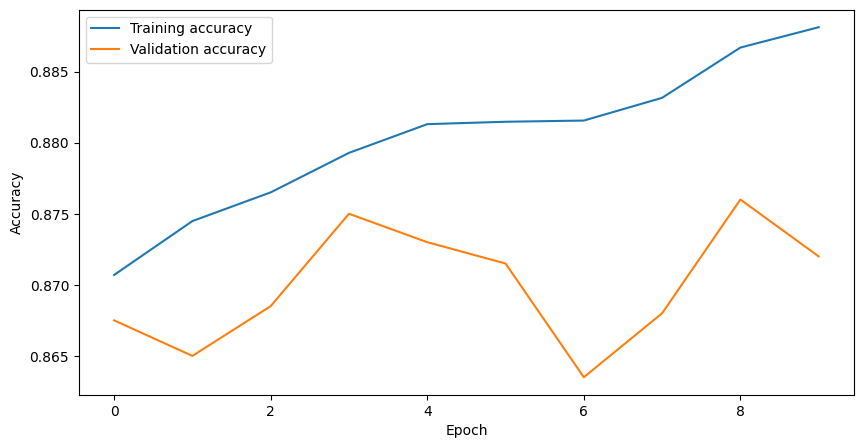

In [14]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Wel jammer dat je niet de volledige 20 epcochs ziet, en alleen de laatste 10.

Maar hier zie je dat het model steeds beter leert op de test data, en ook beter presteert op de test data.

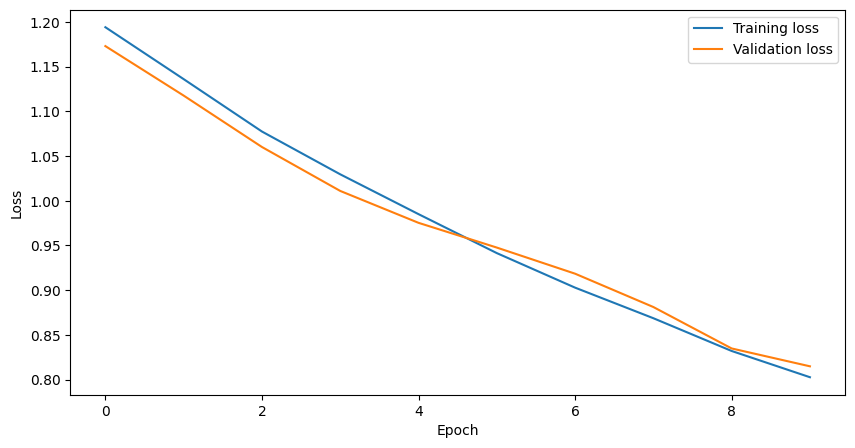

In [15]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Hier zie je dat de loss op de training en test data allebei omlaag gaan, er is dus nog geen spraken van overfiting in mijn model. 



63/63 [==============================] - 19s 305ms/step


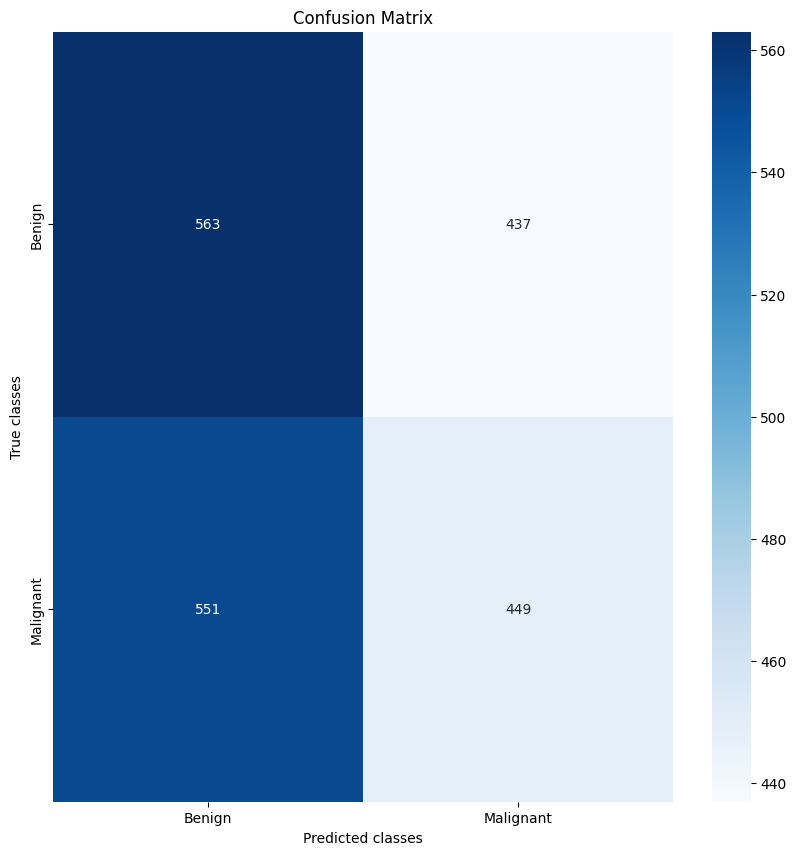

In [17]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

# Get the predictions
predictions = model.predict(test_set)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_set.classes

# Get the class labels
class_labels = list(test_set.class_indices.keys())

# Plot the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Classification report
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      Benign       0.51      0.56      0.53      1000
   Malignant       0.51      0.45      0.48      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000



De classificatierapport toont verschillende statistieken die de prestaties van je model meten. Hier is een interpretatie van de resultaten:

- Precision: Dit is het percentage van de voorspellingen van mijn model dat correct was. Voor zowel 'Benign' als 'Malignant' is dit 0.51, wat betekent dat ongeveer 51% van de voorspellingen van mijn model correct waren voor beide klassen.

- Recall: Dit is het percentage van de daadwerkelijke positieve gevallen dat mijn model correct heeft geïdentificeerd. Voor 'Benign' is dit 0.56 en voor 'Malignant' is dit 0.45. Dit betekent dat mijn model 56% van de werkelijke 'Benign' gevallen correct heeft geïdentificeerd en 45% van de werkelijke 'Malignant' gevallen.

- F1-score: Dit is een gecombineerde maatstaf voor precisie en recall die hun harmonisch gemiddelde neemt. Een F1-score bereikt zijn beste waarde bij 1 (perfecte precisie en recall) en zijn slechtste waarde bij 0. Voor zowel 'Benign' als 'Malignant' is de F1-score ongeveer 0.50, wat suggereert dat er ruimte is voor verbetering.

- Accuracy: Dit is het percentage van de totale voorspellingen dat correct was. De nauwkeurigheid van mijn model is 0.51, wat betekent dat ongeveer 51% van de totale voorspellingen correct was.

# Improve

Om het model beter te laten presteren, laat ik het model nog een 20 epochs trainen.

In [19]:
# 20 More epochs
history = model.fit(train_set,
                    validation_data=test_set,
                    epochs=20)

Epoch 1/20
372/372 [==============================] - 133s 357ms/step - loss: 0.7733 - accuracy: 0.8874 - val_loss: 0.7831 - val_accuracy: 0.8760
Epoch 2/20
372/372 [==============================] - 133s 359ms/step - loss: 0.7445 - accuracy: 0.8899 - val_loss: 0.7490 - val_accuracy: 0.8835
Epoch 3/20
372/372 [==============================] - 133s 358ms/step - loss: 0.7242 - accuracy: 0.8897 - val_loss: 0.7353 - val_accuracy: 0.8795
Epoch 4/20
372/372 [==============================] - 133s 357ms/step - loss: 0.7022 - accuracy: 0.8888 - val_loss: 0.7129 - val_accuracy: 0.8790
Epoch 5/20
372/372 [==============================] - 133s 357ms/step - loss: 0.6789 - accuracy: 0.8907 - val_loss: 0.7090 - val_accuracy: 0.8725
Epoch 6/20
372/372 [==============================] - 137s 368ms/step - loss: 0.6624 - accuracy: 0.8911 - val_loss: 0.6759 - val_accuracy: 0.8890
Epoch 7/20
372/372 [==============================] - 137s 368ms/step - loss: 0.6420 - accuracy: 0.8950 - val_loss: 0.6609 -

In [21]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_set)
print('Test accuracy:', test_accuracy)

63/63 [==============================] - 20s 314ms/step - loss: 0.5073 - accuracy: 0.8950
Test accuracy: 0.8949999809265137


Nu dat het model nog 20 epochs getraind heeft op de test set, is de accuracy met 2 procent omhoog gegaan.

Misschien kan ik dit nog hoger krijgen, met meer epochs, alleen dat duurt mij te lang. (30 min per 10 epochs).


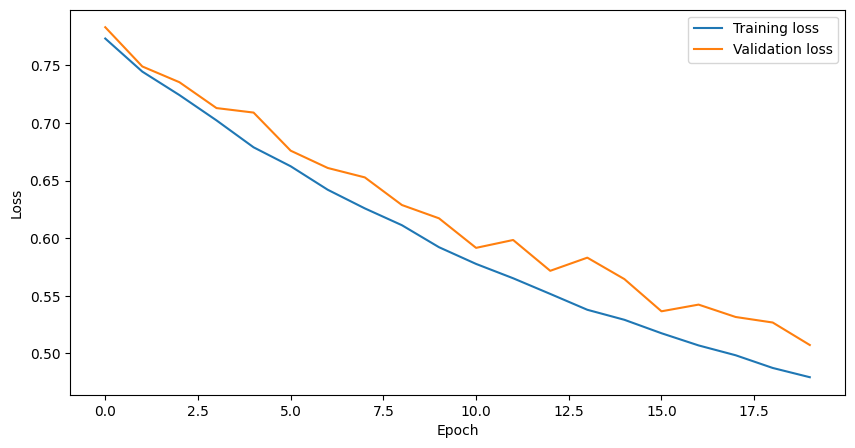

In [22]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Weer zie je dat de loss voor beide nog steeds omlaag gaat, dus er is nog steeds geen spraken van overfitting.

Er is dus nog ruimte om het model verder te trainen voor nog een paar procent.

# Evaluate

Uiteindelijk heeft mijn model een accuray van ongeveer 90%.

Dit is best wel prima vind ik zelf. Ook is er nog ruimte voor verbeteren door het model nog langer te laten trainen, en wellicht andere / meer data te gebruiken.

Overal vind ik dat dit een groot succes is.

Wel moet ik zeggen dat 90%, zoals ik eerder zei, niet hoog genoeg is om te gebruiken in medische condities. Dat is veels te riskant.